# 🚴‍♀️ Bike Sales – Exploratory Data Analysis (EDA)

This notebook performs an **Exploratory Data Analysis (EDA)** on the Bike Sales dataset from Kaggle.  
The goal is to understand the structure of the data, identify missing or inconsistent values, generate basic statistics, and create initial visualizations.

**Steps:**
1. Load all CSV files into DataFrames
2. Inspect data types and missing values
3. Generate descriptive statistics
4. Create initial visualizations

**Technologies:** Python, Pandas, Matplotlib, Seaborn

### **Step 1 :** Import necessary libraries

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display plots inside the notebook
%matplotlib inline

# Set visual style
sns.set(style="whitegrid")

### **Step 2:** Load all the CSV files

In [25]:
# Load datasets with encoding fallback
addresses = pd.read_csv("data/Addresses.csv", encoding="ISO-8859-1")
business_partners = pd.read_csv("data/BusinessPartners.csv", encoding="ISO-8859-1")
employees = pd.read_csv("data/Employees.csv", encoding="ISO-8859-1")
product_categories = pd.read_csv("data/ProductCategories.csv", encoding="ISO-8859-1")
products = pd.read_csv("data/Products.csv", encoding="ISO-8859-1")
product_texts = pd.read_csv("data/ProductTexts.csv", encoding="ISO-8859-1")
sales_order_items = pd.read_csv("data/SalesOrderItems.csv", encoding="ISO-8859-1")
sales_orders = pd.read_csv("data/SalesOrders.csv", encoding="ISO-8859-1")

### **Step 3:** Review the tables and begin explorations.

**Step 3.1:** Let’s start with the *addresses* table.

In [48]:
# Check how large the addresses table is
addresses.shape

(54, 12)

In [37]:
# Preview of the addresses table
addresses.head()

,ï»¿ADDRESSID,CITY,POSTALCODE,STREET,BUILDING,COUNTRY,REGION,ADDRESSTYPE,VALIDITY_STARTDATE,VALIDITY_ENDDATE,LATITUDE,LONGITUDE
0,1000000034,West Nyack,10994,Settlers Lane,5027.0,US,AMER,2,20000101,99991231,41.100057,-73.973562
1,1000000035,Fair Oaks,95628,Woodland Terrace,4467.0,US,AMER,2,20000101,99991231,38.638355,-121.286683
2,1000000036,Dunn,28334,Layman Avenue,2250.0,US,AMER,2,20000101,99991231,35.312013,-78.609950
3,1000000037,Chicago,60605,University Drive,4697.0,US,AMER,2,20000101,99991231,41.874591,-87.627303
4,1000000038,Ocala,34471,Bagwell Avenue,1565.0,US,AMER,2,20000101,99991231,29.183977,-82.118413


**Country Distribution in `addresses`**

Let's examine the *Country* column to see if all entries are from the US or if other countries appear.

In [34]:
# Check unique countries in the addresses table
addresses["COUNTRY"].value_counts()

COUNTRY
US    9
CA    9
GB    6
DE    6
AU    6
IN    6
DU    6
FR    6
Name: count, dtype: int64

The abbreviations here are ISO country codes. Their expansions are as follows:
US → United States
CA → Canada
GB → Great Britain / United Kingdom
DE → Germany
AU → Australia
IN → India
FR → France

**Note:** However, DU is not an official ISO country code. It is likely a data error or an incorrect entry. Sometimes DU is used to refer to “Dubai” (which is actually a city in the UAE, not a country) or it may have been mistakenly entered instead of NL (Netherlands).

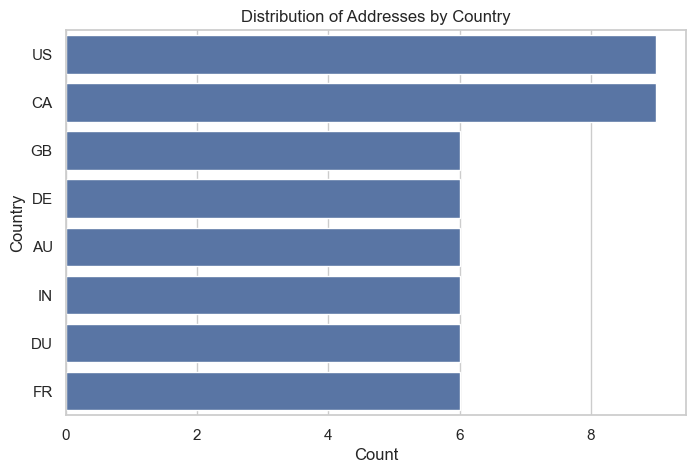

In [32]:
plt.figure(figsize=(8,5))
sns.countplot(data=addresses, y="COUNTRY", order=addresses["COUNTRY"].value_counts().index)
plt.title("Distribution of Addresses by Country")
plt.xlabel("Count")
plt.ylabel("Country")
plt.show()

**Step 3.2:** Let’s examine with the *business_partners* table.

In [39]:
# Check how large the business_partners table is
business_partners.shape

(40, 14)

In [38]:
# Preview of the business_partners table
business_partners.head()

,PARTNERID,PARTNERROLE,EMAILADDRESS,PHONENUMBER,FAXNUMBER,WEBADDRESS,ADDRESSID,COMPANYNAME,LEGALFORM,CREATEDBY,CREATEDAT,CHANGEDBY,CHANGEDAT,CURRENCY
0,100000000,2,maria.brown@all4bikes.com,622734567,NaN,http://www.all4bikes.com,1000000034,All For Bikes,Inc.,10,20181003,10,20181003,USD
1,100000001,2,bob.buyer@amazebikes.com,3088530,NaN,http://www.amazebikes.com,1000000035,Amaze Bikes Inc,Inc.,13,20181003,13,20181003,USD
2,100000002,2,victor.sanchez@arenasportusa.com,3023352668,NaN,http://www.arenasportusa.com,1000000036,Arena Sports Inc,Inc.,14,20181003,14,20181003,USD
3,100000003,2,franklin.jones@atlantausa.com,511403266,NaN,http://www.atlantausa.com,1000000037,Atlanta Corp Inc,Inc.,10,20181003,10,20181003,USD
4,100000004,2,robert_brown@bikeworlds.com,2244668800,NaN,http://www.bikeworlds.com,1000000038,Bike World Inc,Inc.,4,20181003,4,20181003,USD


**Unique Companies in `business_partners`**

Count distinct companies to assess partner diversity.

In [45]:
# Count unique companies
business_partners["COMPANYNAME"].nunique()

40

In [46]:
business_partners["COMPANYNAME"].unique()

array(['All For Bikes', 'Amaze Bikes Inc', 'Arena Sports Inc',
       'Atlanta Corp Inc', 'Bike World Inc', 'Alpha AG',
       'BuchungsKreis 1010', 'Trek Cycle AG', 'Tona Bikes AG',
       'Meine Bicycle', 'Avante Grande Bikes', 'Bike On',
       'Carefree Cycles', 'G&M Bicycle', 'Keep Cycling',
       'iCare Australia', 'CC SportWorld', 'DigiPay',
       'TechCycle Canberra', 'eBike 100', 'Cycle World',
       'High Tech Sports Inc', 'Tires On Fire', 'MX Bike', 'FitnessWorld',
       'Homerun Millwork Inc.', 'Antonio Bandolera', 'Khan Cycles',
       'Palm Beach Bike World', 'A to Z Fitness', 'Hudson SportsTec',
       'Ebike 36', 'Wichita Sport', 'Move by Bike', 'TechCycle',
       'YourCycleShop', 'Unolab Manufacturing', 'E bike 201',
       'The Cycle Factor', 'Eiffel Bikes'], dtype=object)

**Step 3.3:** Let’s examine with the *employees* table.

In [49]:
# Check how large the employees table is
employees.shape

(14, 19)

In [50]:
# Preview of the addresses table
employees.head()

,EMPLOYEEID,NAME_FIRST,NAME_MIDDLE,NAME_LAST,NAME_INITIALS,SEX,LANGUAGE,PHONENUMBER,EMAILADDRESS,LOGINNAME,ADDRESSID,VALIDITY_STARTDATE,VALIDITY_ENDDATE,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,1,Derrick,L,Magill,NaN,M,E,630-374-0306,derrick.magill@itelo.info,derrickm,1000000001,20000101,99991231,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Philipp,T,Egger,NaN,M,E,09603 61 24 64,philipp.egger@itelo.info,philippm,1000000002,20000101,99991231,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Ellis,K,Robertson,NaN,M,E,070 8691 2288,ellis.robertson@itelo.info,ellism,1000000003,20000101,99991231,NaN,NaN,NaN,NaN,NaN,NaN
3,4,William,M,Mussen,NaN,M,E,026734 4556,william.mussen@itelo.info,williamm,1000000004,20000101,99991231,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Javas,NaN,Hegde,NaN,M,E,02224135120,javas.hegde@itelo.info,javasm,1000000005,20000101,99991231,NaN,NaN,NaN,NaN,NaN,NaN


**Gender Distribution in `employees`**

Count males and females from the `SEX` column.

In [52]:
employees["SEX"].value_counts()

SEX
M    10
F     4
Name: count, dtype: int64

**Missing Values in `NAME_INITIALS`**

Check if all entries in `NAME_INITIALS` are NaN.

In [53]:
employees["NAME_INITIALS"].isna().all()

np.True_

**Language in `employees`**

Check if all `LANGUAGE` entries are "E".

In [57]:
(employees["LANGUAGE"] == "E").all()

np.True_

**Missing Values in Last 6 `Unnamed` Columns**

Check if the last six columns without headers are empty.

In [59]:
# Identify columns whose names start with 'Unnamed'
unnamed_cols = [col for col in employees.columns if col.startswith("Unnamed")]

# Check if all values in each of these columns are NaN
employees[unnamed_cols].isna().all()

Unnamed: 13    True
Unnamed: 14    True
Unnamed: 15    True
Unnamed: 16    True
Unnamed: 17    True
Unnamed: 18    True
dtype: bool

**Note:** Based on the inspection results, there are 7 columns in this table that contain only missing (NaN) values. These columns should be considered for removal or proper handling during the data cleaning phase to improve data quality and reduce unnecessary storage.

**Step 3.4:** Let’s examine with the *product_categories* table.

In [10]:
# Check column types and non-null counts
sales_orders.info()

# Check missing values
sales_orders.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SALESORDERID      334 non-null    int64  
 1   CREATEDBY         334 non-null    int64  
 2   CREATEDAT         334 non-null    int64  
 3   CHANGEDBY         334 non-null    int64  
 4   CHANGEDAT         334 non-null    int64  
 5   FISCVARIANT       334 non-null    object 
 6   FISCALYEARPERIOD  334 non-null    int64  
 7   NOTEID            0 non-null      float64
 8   PARTNERID         334 non-null    int64  
 9   SALESORG          334 non-null    object 
 10  CURRENCY          334 non-null    object 
 11  GROSSAMOUNT       334 non-null    int64  
 12  NETAMOUNT         334 non-null    float64
 13  TAXAMOUNT         334 non-null    float64
 14  LIFECYCLESTATUS   334 non-null    object 
 15  BILLINGSTATUS     334 non-null    object 
 16  DELIVERYSTATUS    334 non-null    object 
dt

SALESORDERID          0
CREATEDBY             0
CREATEDAT             0
CHANGEDBY             0
CHANGEDAT             0
FISCVARIANT           0
FISCALYEARPERIOD      0
NOTEID              334
PARTNERID             0
SALESORG              0
CURRENCY              0
GROSSAMOUNT           0
NETAMOUNT             0
TAXAMOUNT             0
LIFECYCLESTATUS       0
BILLINGSTATUS         0
DELIVERYSTATUS        0
dtype: int64

In [11]:
# Summary statistics for numeric columns
sales_orders.describe()


,SALESORDERID,CREATEDBY,CREATEDAT,CHANGEDBY,CHANGEDAT,FISCALYEARPERIOD,NOTEID,PARTNERID,GROSSAMOUNT,NETAMOUNT,TAXAMOUNT
count,3.340000e+02,334.000000,3.340000e+02,334.000000,3.340000e+02,3.340000e+02,0.0,3.340000e+02,334.000000,334.000000,334.000000
mean,5.000002e+08,5.919162,2.018365e+07,5.919162,2.018366e+07,2.018311e+06,NaN,1.000000e+08,61179.272455,53531.863398,7647.409057
std,9.656172e+01,3.447947,4.474591e+03,3.447947,4.475634e+03,4.597893e+02,NaN,1.173000e+01,41036.220808,35906.693207,5129.527601
min,5.000000e+08,1.000000,2.018011e+07,1.000000,2.018012e+07,2.018001e+06,NaN,1.000000e+08,379.000000,331.625000,47.375000
25%,5.000001e+08,3.000000,2.018052e+07,3.000000,2.018052e+07,2.018005e+06,NaN,1.000000e+08,29097.750000,25460.531250,3637.218750
50%,5.000002e+08,5.000000,2.018100e+07,5.000000,2.018100e+07,2.018010e+06,NaN,1.000000e+08,55599.000000,48649.125000,6949.875000
75%,5.000002e+08,8.000000,2.019020e+07,8.000000,2.019021e+07,2.019002e+06,NaN,1.000000e+08,85473.500000,74789.312500,10684.187500
max,5.000003e+08,14.000000,2.019063e+07,14.000000,2.019070e+07,2.019006e+06,NaN,1.000000e+08,193987.000000,169738.625000,24248.375000


In [12]:
# Unique values in categorical columns
print("Sales Organizations:", sales_orders["SALESORG"].unique())
print("Currency types:", sales_orders["CURRENCY"].unique())

Sales Organizations: ['APJ' 'EMEA' 'AMER']
Currency types: ['USD']


In [14]:
print(sales_orders.columns)

Index(['SALESORDERID', 'CREATEDBY', 'CREATEDAT', 'CHANGEDBY', 'CHANGEDAT',
       'FISCVARIANT', 'FISCALYEARPERIOD', 'NOTEID', 'PARTNERID', 'SALESORG',
       'CURRENCY', 'GROSSAMOUNT', 'NETAMOUNT', 'TAXAMOUNT', 'LIFECYCLESTATUS',
       'BILLINGSTATUS', 'DELIVERYSTATUS'],
      dtype='object')


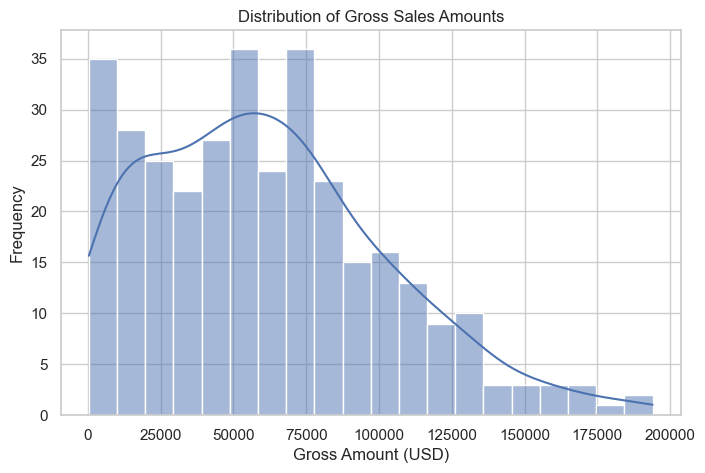

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(data=sales_orders, x="GROSSAMOUNT", bins=20, kde=True)
plt.title("Distribution of Gross Sales Amounts")
plt.xlabel("Gross Amount (USD)")
plt.ylabel("Frequency")
plt.show()

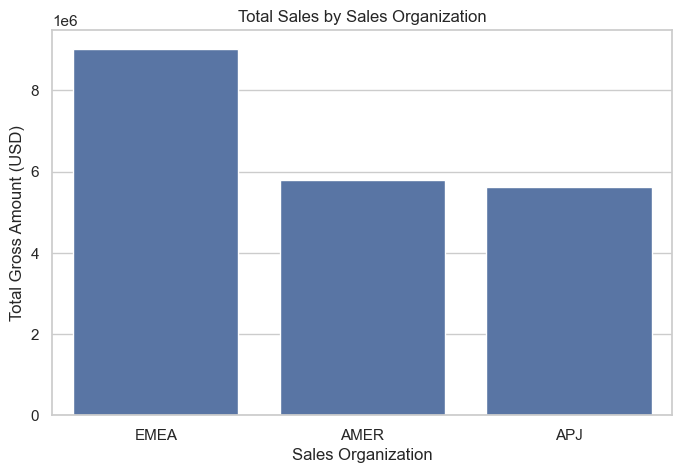

In [17]:
sales_by_org = sales_orders.groupby("SALESORG")["GROSSAMOUNT"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=sales_by_org.index, y=sales_by_org.values)
plt.title("Total Sales by Sales Organization")
plt.xlabel("Sales Organization")
plt.ylabel("Total Gross Amount (USD)")
plt.show()

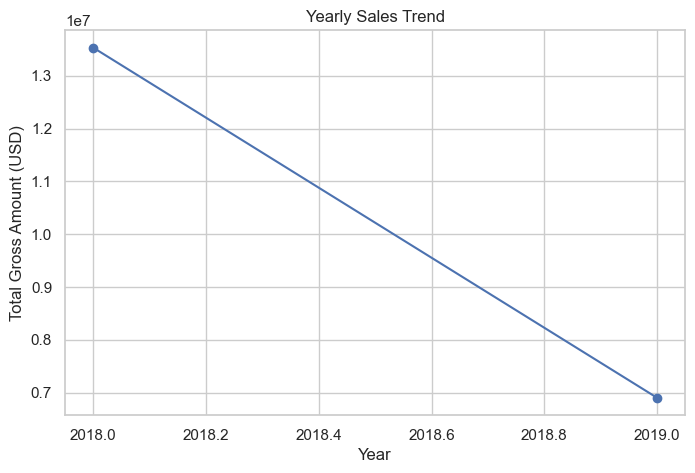

In [18]:
sales_orders["CREATEDAT"] = pd.to_datetime(sales_orders["CREATEDAT"], format="%Y%m%d")
sales_by_year = sales_orders.groupby(sales_orders["CREATEDAT"].dt.year)["GROSSAMOUNT"].sum()

plt.figure(figsize=(8,5))
sales_by_year.plot(kind="line", marker="o")
plt.title("Yearly Sales Trend")
plt.xlabel("Year")
plt.ylabel("Total Gross Amount (USD)")
plt.grid(True)
plt.show()


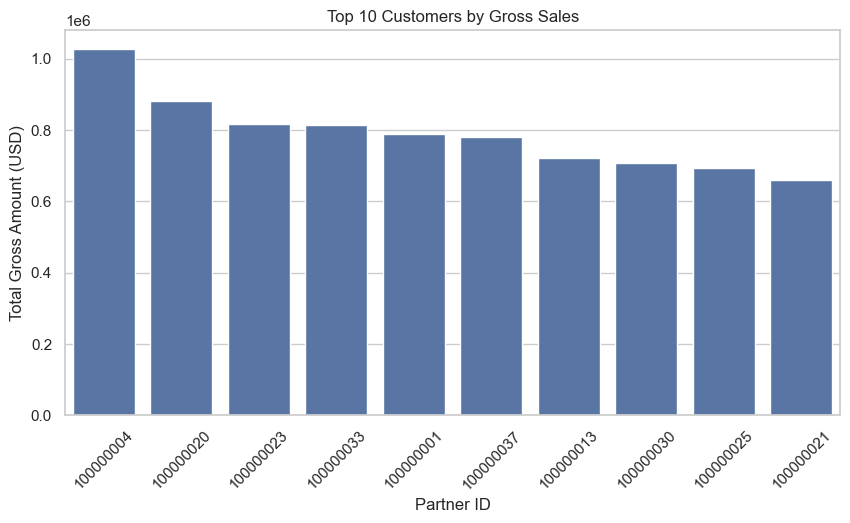

In [19]:
top_customers = sales_orders.groupby("PARTNERID")["GROSSAMOUNT"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_customers.index.astype(str), y=top_customers.values)
plt.title("Top 10 Customers by Gross Sales")
plt.xlabel("Partner ID")
plt.ylabel("Total Gross Amount (USD)")
plt.xticks(rotation=45)
plt.show()


<Axes: >

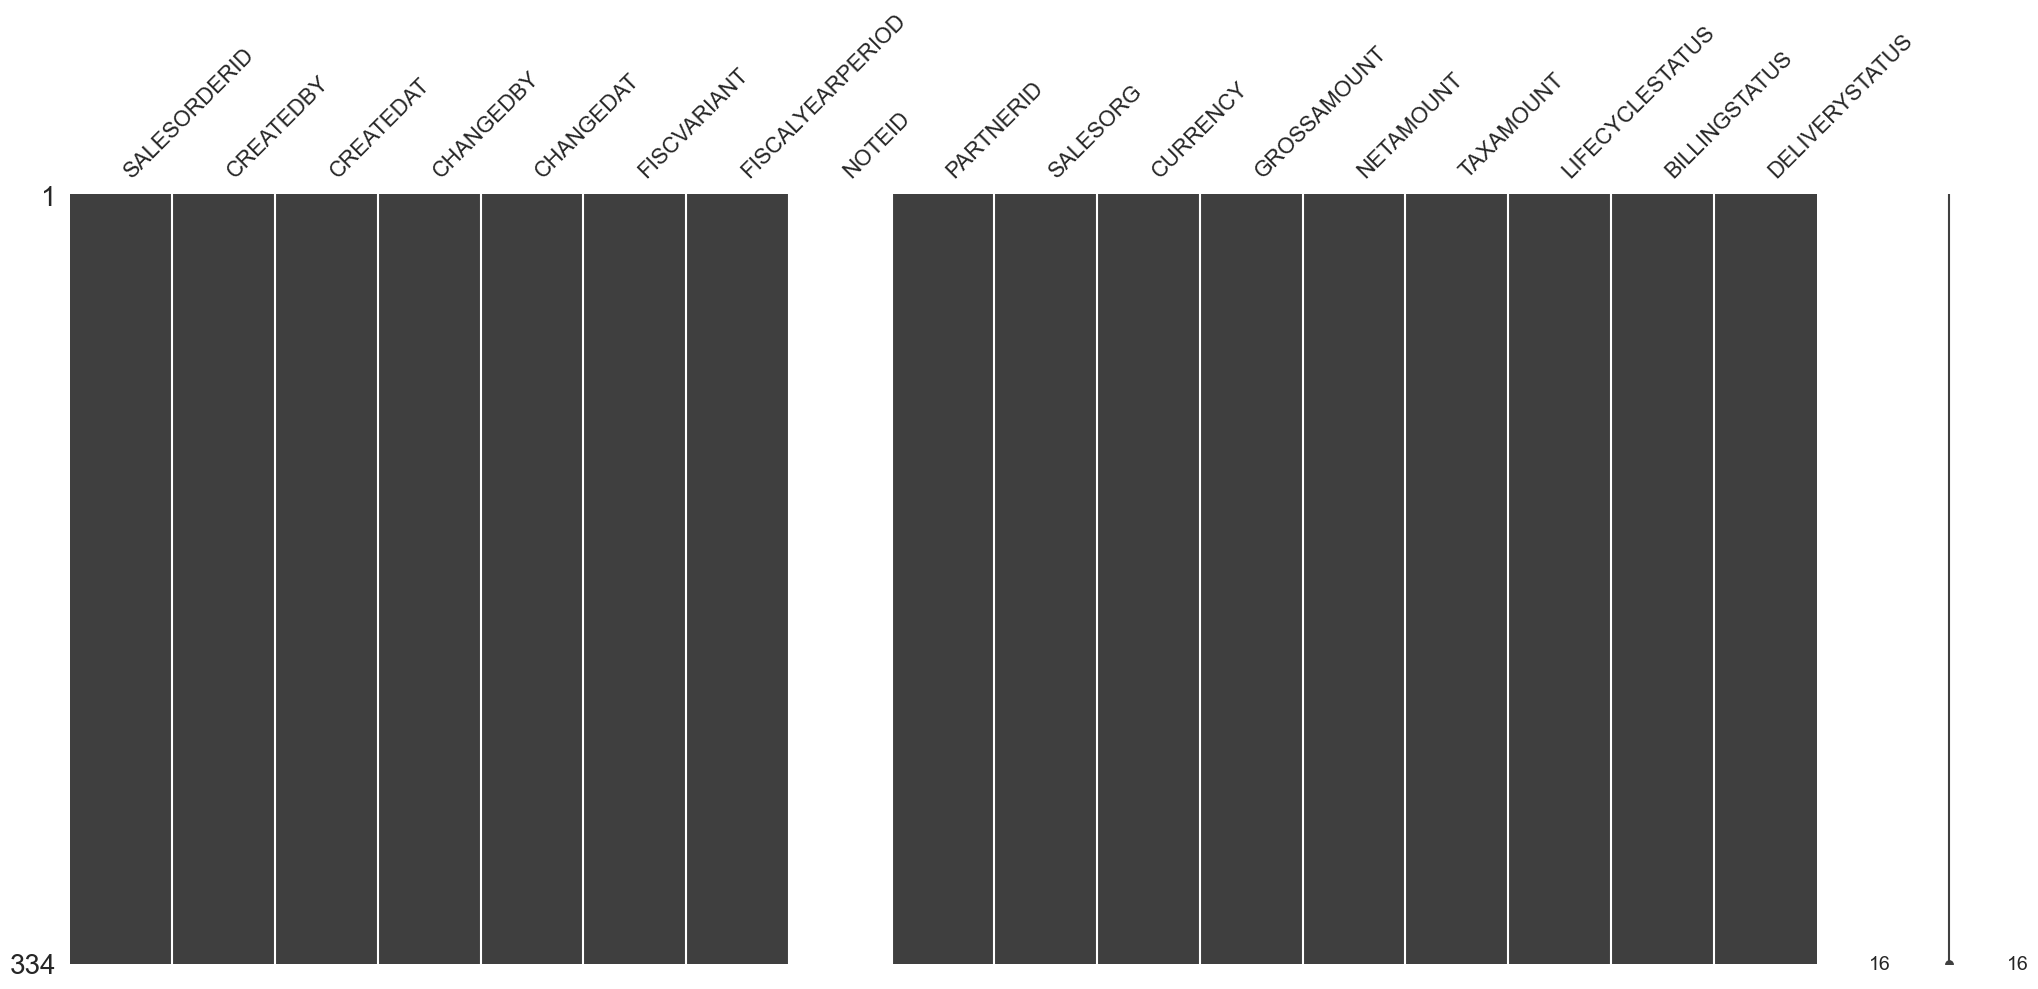

In [20]:
import missingno as msno
msno.matrix(sales_orders)